Simulando 50 generaciones con AC 1D de 2º orden (Base W0/2 XOR Memoria)...
Generación 0: 000000000000000000000100000000000000000000
Generación 1: 111111111111111111110001111111111111111111
Generación 2: 100000000000000000010001000000000000000001
Generación 3: 110000000000000000110101100000000000000011
Generación 4: 010111111111111110101010101111111111111010
Generación 5: 111100000000000011100000111000000000001111
Generación 6: 110010000000000100000100000100000000010011
Generación 7: 001100111111110010010001001001111111001100
Generación 8: 011110100000010100000000000101000001011110
Generación 9: 011111110000111011101110111011100011111110
Generación 10: 001110110110111010111011101011101011011100
Generación 11: 110100001111010110000000001101010100001011
Generación 12: 110111011111010100000100000101000010111011
Generación 13: 001001111110111111110001111111001101100100
Generación 14: 010110011100110100010001000100001101011010
Generación 15: 000111101010000110110101101110100011011000
Generac

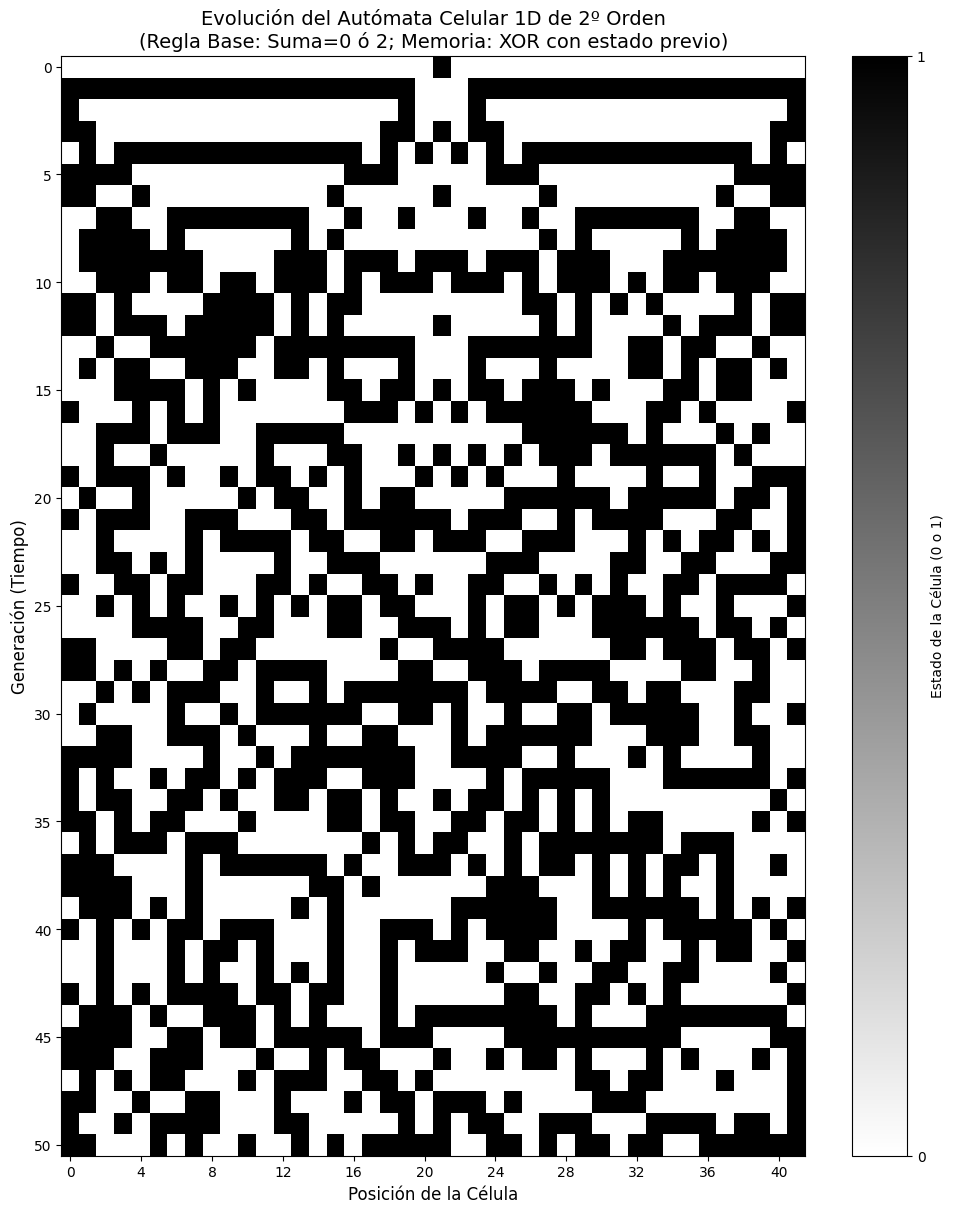

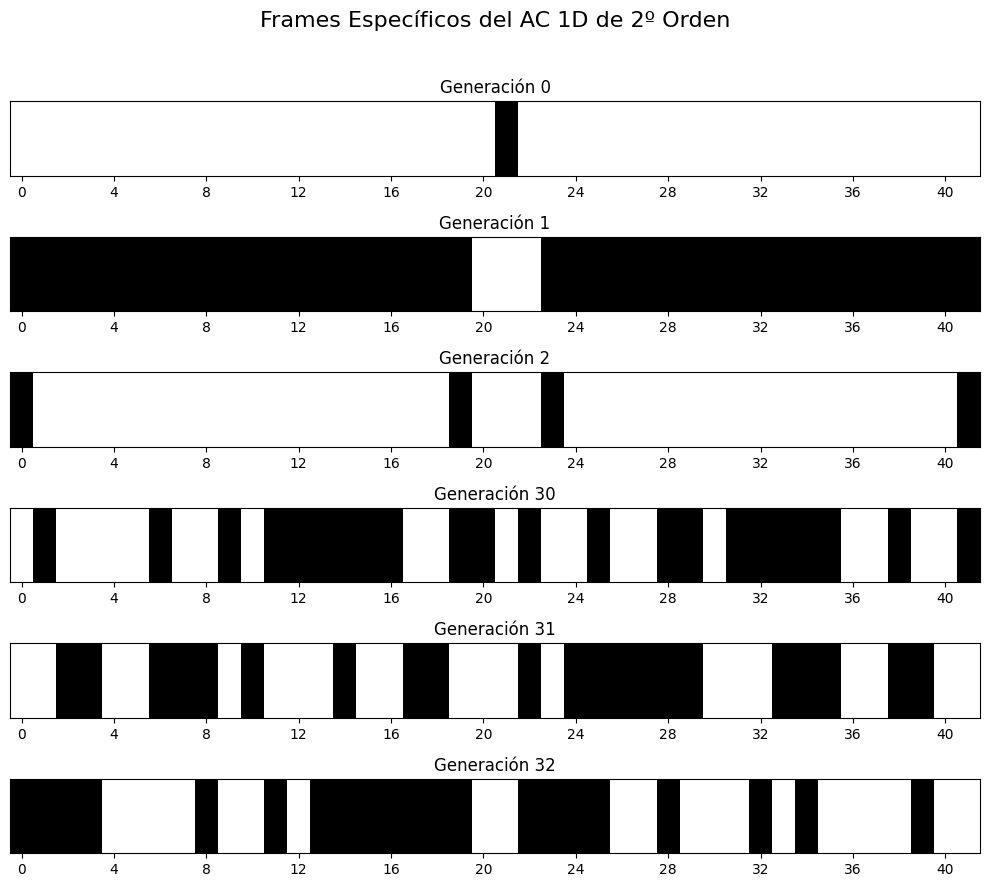

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la regla y funciones ---

def get_triplet_1d(state_array, index, width):
    """
    Obtiene el triplete (vecindad de radio 1) para una célula en un array 1D.
    Maneja los bordes rellenando con 0 (condiciones de frontera nulas).
    """
    left = state_array[index - 1] if index > 0 else 0
    center = state_array[index]
    right = state_array[index + 1] if index < width - 1 else 0
    return (left, center, right)

def apply_base_rule_W02(triplet):
    """
    Aplica la regla base: activa si la suma del triplete es 0 o 2.
    Dígitos de boleta usados: 0, 2.
    """
    s = sum(triplet)
    if s == 0 or s == 2:
        return 1
    return 0

def step_1d_second_order_xor(current_state_str, previous_state_str):
    """
    Calcula la siguiente generación para el AC 1D de segundo orden.
    Regla base W0/2, memoria con XOR.
    """
    width = len(current_state_str)

    # Convertir strings a listas de enteros
    current_state = [int(c) for c in current_state_str]
    previous_state = [int(c) for c in previous_state_str]

    next_state_list = [0] * width

    for i in range(width):
        triplet = get_triplet_1d(current_state, i, width)
        base_output = apply_base_rule_W02(triplet)

        # Aplicar memoria (XOR con el estado anterior de la misma célula)
        final_output = base_output ^ previous_state[i]
        next_state_list[i] = final_output

    return "".join(map(str, next_state_list))


# --- Configuración de la simulación y visualización ---
if __name__ == "__main__":
    # Cadena inicial de unos y ceros
    initial_string = "000000000000000000000100000000000000000000" # Un solo bit activo en el centro
    # initial_string = "000111000111000" # Otro patrón

    WIDTH = len(initial_string)
    NUM_GENERATIONS = 50 # Número de generaciones a simular

    # Inicializar estados
    # Para la primera iteración, previous_state puede ser todo ceros.
    current_t_state_str = initial_string
    previous_t_state_str = "0" * WIDTH

    # Almacenar la evolución para la visualización
    # Cada elemento será una lista de enteros (0 o 1)
    evolution_history = []
    evolution_history.append([int(c) for c in current_t_state_str]) # Guardamos el estado inicial t=0

    print(f"Simulando {NUM_GENERATIONS} generaciones con AC 1D de 2º orden (Base W0/2 XOR Memoria)...")
    print(f"Generación 0: {current_t_state_str}")

    for gen in range(NUM_GENERATIONS):
        next_t_plus_1_state_str = step_1d_second_order_xor(current_t_state_str, previous_t_state_str)

        evolution_history.append([int(c) for c in next_t_plus_1_state_str])

        # Actualizar estados para la siguiente iteración
        previous_t_state_str = current_t_state_str
        current_t_state_str = next_t_plus_1_state_str

        print(f"Generación {gen + 1}: {current_t_state_str}")

        if not np.any([int(c) for c in current_t_state_str]): # Si no hay células vivas
            print(f"\nTodas las células han muerto en la generación {gen + 1}.")
            break

    print("Simulación completada.")

    # --- Visualización con Matplotlib ---
    # Convertir la historia de la evolución a una matriz NumPy
    evolution_matrix = np.array(evolution_history)

    plt.figure(figsize=(12, 12 * (NUM_GENERATIONS / WIDTH) if WIDTH > 0 else 12)) # Ajustar el aspect ratio
    # cmap='Greys' o 'binary' funciona bien para 0 y 1. 'viridis' también es opción.
    plt.imshow(evolution_matrix, cmap='binary', interpolation='nearest', aspect='auto')
    plt.title(f"Evolución del Autómata Celular 1D de 2º Orden\n(Regla Base: Suma=0 ó 2; Memoria: XOR con estado previo)", fontsize=14)
    plt.xlabel("Posición de la Célula", fontsize=12)
    plt.ylabel("Generación (Tiempo)", fontsize=12)
    plt.colorbar(label="Estado de la Célula (0 o 1)", ticks=[0, 1])

    # Mejorar las marcas de los ejes si hay muchas generaciones/células
    if NUM_GENERATIONS > 20:
        plt.yticks(np.arange(0, NUM_GENERATIONS + 1, step=max(1, NUM_GENERATIONS // 10)))
    if WIDTH > 20:
        plt.xticks(np.arange(0, WIDTH, step=max(1, WIDTH // 10)))

    plt.show()

    # --- Mostrar los frames específicos como solicitaste anteriormente (adaptado para 1D) ---
    grids_for_plotting = []
    titles_for_plotting = []

    ADVANCED_ITERATION_START = 30 # Generación a partir de la cual mostrar el segundo bloque

    for gen_idx, state_list in enumerate(evolution_history):
        if gen_idx < 3: # Generaciones 0, 1, 2
            grids_for_plotting.append(np.array(state_list).reshape(1, -1)) # Reshape para imshow
            titles_for_plotting.append(f"Generación {gen_idx}")
        elif ADVANCED_ITERATION_START <= gen_idx < ADVANCED_ITERATION_START + 3:
            if gen_idx < len(evolution_history): # Asegurarse de que la generación exista
                grids_for_plotting.append(np.array(state_list).reshape(1, -1)) # Reshape para imshow
                titles_for_plotting.append(f"Generación {gen_idx}")

    if grids_for_plotting:
        num_grids = len(grids_for_plotting)
        fig, axes = plt.subplots(num_grids, 1, figsize=(10, num_grids * 1.5)) # Cada uno en su fila
        if num_grids == 1:
            axes = [axes] # Asegurar que sea iterable

        fig.suptitle("Frames Específicos del AC 1D de 2º Orden", fontsize=16)
        for i, grid_np in enumerate(grids_for_plotting):
            ax = axes[i]
            ax.imshow(grid_np, cmap='binary', interpolation='nearest', aspect='auto')
            ax.set_title(titles_for_plotting[i])
            ax.set_yticks([]) # Ocultar eje Y para estos plots individuales
            if WIDTH > 20:
                 ax.set_xticks(np.arange(0, WIDTH, step=max(1, WIDTH // 10)))
            else:
                ax.set_xticks(np.arange(0, WIDTH))


        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()